In [1]:
import sys
# Put here the directory containing the folder where the definitions are saved
sys.path.insert(0, r'C:\Users\demdr\UTS\Important files for PhD thesis\Definitions')


In [4]:
from definitions_for_scraping_fitbit_data import scrape_movement_data
from definitions_for_altitude_data_processing import create_firstgradediff_forAlt,find_altitude_features
from definitions_for_speed_data_processing import basic_speed_functions
from definitions_for_hr_data_processing import add_smoother_HR,create_firstgradediff_forHR,find_HR_mean_and_std_thirtyseconds,detect_faulty_hr_secondstep,calculate_intensity_of_HR
from definitions_for_HR_peak_detection import HR_peak_detection

import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# For map visualisation only

import folium
from IPython.display import IFrame
from IPython.display import display
from folium.plugins import HeatMap
import branca.colormap

#### ------If the user is using a device that can be connected to Strava:
Then we connect their Fitbit/Apple/Garmin etc. account to strava and we pull their data from there. In this case, we only need to know the email and the password of the strava account of the user. The strava account should be connected with their fitbit/etc. account beforehand.

The user can also use their strava account only to collect GPS data, without connecting it to a device for HR data.

If we have collected GPS data from an alternative source, then we have to use the following alternative file:
-'Step 2 alternative - Collect and process movement data from GPS sensors' from the 'Alternative files' folder


#### Put here the email and password that were used to create the strava account of the user 


In [10]:

participant_email = 'eeeeeee' # put here the email of the participant; i.e. blablabla@gmail.com
participant_password = 'pppppppp' # put here the password 
participant_ID = 'A' # the unique id for this participant (this should be the same as the one used in the 'Step 1 - Process accelerometer data' file

df = scrape_movement_data(participant_email, participant_password, participant_ID)
df

athlete_url: https://www.strava.com/athletes/44324042/training/log
no of activities: 2
2019-07-16 13:09:31+10:00
2019-07-16 14:07:04+10:00


,Latitude,Longitude,Altitude,Distance,Heart rate,Session,UserID
Datetime,,,,,,,
2019-07-16 13:09:31+10:00,-33.882890,151.202335,26.9,0,79,A_16-07-2019 13:09,A
2019-07-16 13:09:36+10:00,-33.882888,151.202338,26.9,0,79,A_16-07-2019 13:09,A
2019-07-16 13:09:37+10:00,-33.882888,151.202339,26.9,0,79,A_16-07-2019 13:09,A
2019-07-16 13:09:40+10:00,-33.882886,151.202325,26.9,0,78,A_16-07-2019 13:09,A
2019-07-16 13:09:45+10:00,-33.882896,151.202311,26.9,0,80,A_16-07-2019 13:09,A
...,...,...,...,...,...,...,...
2019-07-16 14:17:38+10:00,-33.882909,151.202373,25.6,0,127,A_16-07-2019 14:07,A
2019-07-16 14:17:43+10:00,-33.882909,151.202373,25.6,0,127,A_16-07-2019 14:07,A
2019-07-16 14:17:48+10:00,-33.882909,151.202373,25.6,0,127,A_16-07-2019 14:07,A


#### Calculate the speed- and altitude-related features

In [11]:
for_final_df = pd.DataFrame()

for ses in df['Session'].unique():
    subdf = df[df['Session']==ses]
    test = basic_speed_functions(subdf)
    session_df = test.copy()

    session_df = create_firstgradediff_forAlt(session_df)
    session_df['Altitude_dif'] = round(session_df['Altitude_dif'], 2)
    session_df = find_altitude_features(session_df)
    
    for_final_df = for_final_df.append(session_df)

#### Print graphs (for speed and change in altitude) for each session of this participant 

A_16-07-2019 13:09
A_16-07-2019 14:07


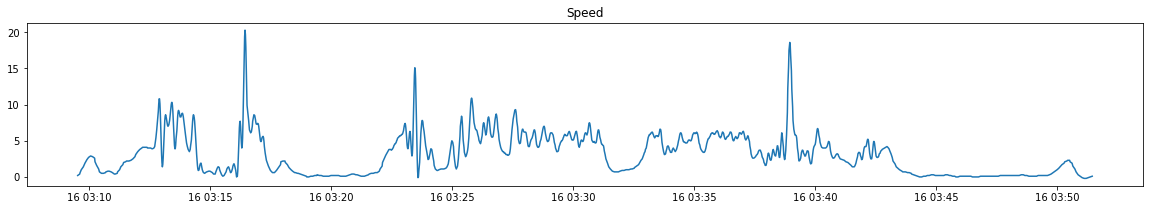

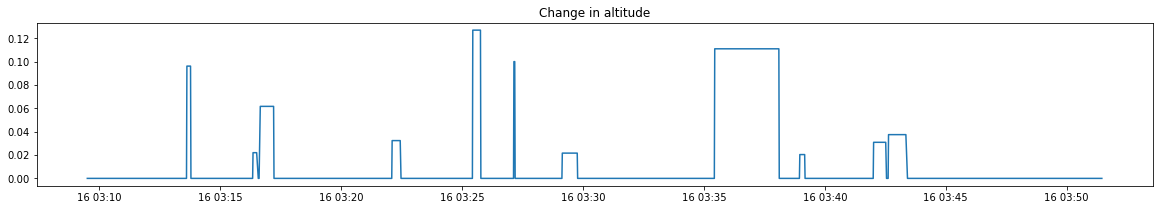

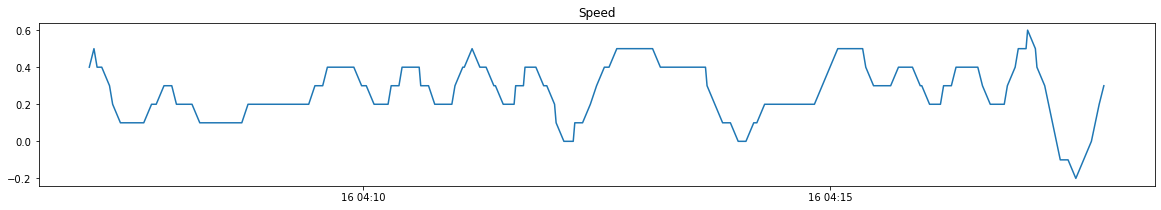

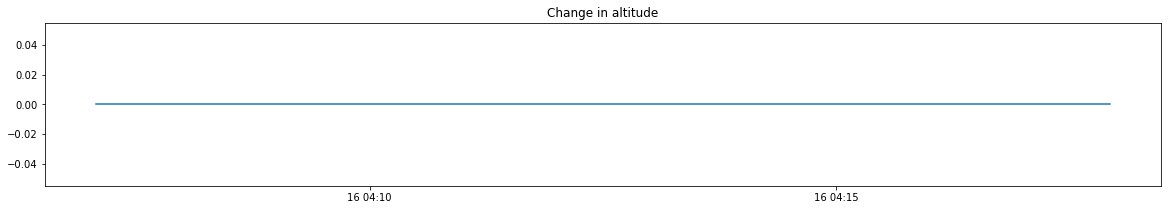

In [12]:

for ses in for_final_df['Session'].unique():
    print(ses)
    session_df = for_final_df[for_final_df['Session']==ses]
    plt.figure(figsize=(20,3))
    plt.plot(session_df['Speed'])
    plt.title('Speed')
    plt.figure(figsize=(20,3))
    plt.plot(session_df['Altitude change_slope'])
    plt.title('Change in altitude')


#### Save the resulting files

In [13]:
# Put here the name of the directory where you want to save the resulting files
#path_to_save = 'XXXX.csv'
# For the example displayed in the file 'Step 1 - Process EDA, accelerometer and skin temperature data',
# the saving path for that participant would be the following:
path_to_save = r'C:\Users\demdr\Desktop\Testing the thesis functions\Project data\Analysed data\Participants\A\Speed data\Session 1.csv'


for_final_df.fillna(0).to_csv(path_to_save)

# Extra code for visualising the movement path of the participant

In [14]:
df_for_visualisation = for_final_df.fillna(0)
# put here other coordinates if needed
c_point = (for_final_df['Latitude'].mean(),for_final_df['Longitude'].mean())
route_map = folium.Map(location = [c_point[0],c_point[1]], zoom_start = 20, tiles='cartodbpositron') 
this_map_name = "ID_GPS movements.html".replace('ID',participant_ID)
route_map.save(this_map_name)



steps = 20

from collections import defaultdict

colormap = branca.colormap.linear.YlOrRd_09.scale(0.0, 0.9).to_step(steps)
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
g1=gradient_map
HeatMap(data=df_for_visualisation[df_for_visualisation['Moving']==1][::2][['Latitude', 'Longitude', 'Speed']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(),gradient=g1, max_val=200, min_opacity=0.3, blur=14, radius=7, max_zoom=13).add_to(route_map)


                


route_map.save(this_map_name)


this_map_name_new = '.'.replace('.','./') + this_map_name
display(IFrame(src=this_map_name_new, width=1500, height=1500))
